In [1]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 27kB/s 
     |████████████████████████████████| 6.6MB 39.9MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.5.0+cu101 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
     |████████████████████████████████| 276kB 5.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=6f93fec54865f803f92a732f1b0fb7b274df5e7d9d319ee0ffc32e10f3594a10
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.1

In [2]:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 840kB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210311-cp37-none-any.whl size=58461 sha256=19b53a3608227eb04ad42944e2f06a2bbec3fda7c6088b419fc19e1da9a589ef
  Stored in directory: /root/.cache/pip/wheels/bc/cc/93/e011d6b86d91631d948f9bda94d60b82b51302192eb8a688c8
  Created wheel for iopath: filename=iopath-0.1.6-cp37-none-any.whl size=18269 sha256=dbe83e64ee118329649561da4a153992fca245a1df27e943ae24fa93e3831ac7
  Stored in directory: /root/.cache/pip/wheels/ff/87/55/7513122394822977f993e1798bfebb46730d6183df8db7b283
Successfully built fvcore iopath


In [ ]:
!mkdir /content/DeepFashion2/
!gdown --id 1O45YqhREBOoLudjA06HcTehcEebR0o9y -O /content/DeepFashion2/train.zip

Downloading...
From: https://drive.google.com/uc?id=1O45YqhREBOoLudjA06HcTehcEebR0o9y
To: /content/DeepFashion2/train.zip
1.82GB [00:36, 49.2MB/s]


In [ ]:
!unzip -P "2019Deepfashion2**" /content/DeepFashion2/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: validation/image/007349.jpg  
  inflating: validation/image/007310.jpg  
  inflating: validation/image/007286.jpg  
  inflating: validation/image/007274.jpg  
  inflating: validation/image/007218.jpg  
  inflating: validation/image/007216.jpg  
  inflating: validation/image/007204.jpg  
  inflating: validation/image/007133.jpg  
  inflating: validation/image/007081.jpg  
  inflating: validation/image/007045.jpg  
  inflating: validation/image/007044.jpg  
  inflating: validation/image/007017.jpg  
  inflating: validation/image/006960.jpg  
  inflating: validation/image/006868.jpg  
  inflating: validation/image/006831.jpg  
  inflating: validation/image/006773.jpg  
  inflating: validation/image/006744.jpg  
  inflating: validation/image/006720.jpg  
  inflating: validation/image/006711.jpg  
  inflating: validation/image/006696.jpg  
  inflating: validation/image/006591.jpg  
  inflating: validation/image/006587.jpg  
  i

In [ ]:
!ls /content/validation/image | wc -l
!ls /content/validation/annos | wc -l

32153
32153


In [ ]:
from PIL import Image
import numpy as np
import json

dataset = {
    "info": {},
    "licenses": [],
    "images": [],
    "annotations": [],
    "categories": []
}

lst_name = ['short_sleeved_shirt', 'long_sleeved_shirt', 'short_sleeved_outwear', 'long_sleeved_outwear',
            'vest', 'sling', 'shorts', 'trousers', 'skirt', 'short_sleeved_dress',
            'long_sleeved_dress', 'vest_dress', 'sling_dress']

for idx, e  in enumerate(lst_name):
    dataset['categories'].append({
        'id': idx + 1,
        'name': e,
        'supercategory': "clothes",
        'keypoints': ['%i' % (i) for i in range(1, 295)],
        'skeleton': []
    })

num_images = 32153 #191961 
sub_index = 0  # the index of ground truth instance
for num in range(1, num_images + 1):
    json_name = '/content/validation/annos/' + str(num).zfill(6) + '.json'
    image_name = '/content/validation/image/' + str(num).zfill(6) + '.jpg'

    if (num >= 0):
        imag = Image.open(image_name)
        width, height = imag.size
        with open(json_name, 'r') as f:
            temp = json.loads(f.read())
            pair_id = temp['pair_id']

            dataset['images'].append({
                'coco_url': '',
                'date_captured': '',
                'file_name': str(num).zfill(6) + '.jpg',
                'flickr_url': '',
                'id': num,
                'license': 0,
                'width': width,
                'height': height
            })
            for i in temp:
                if i == 'source' or i == 'pair_id':
                    continue
                else:
                    points = np.zeros(294 * 3)
                    sub_index = sub_index + 1
                    box = temp[i]['bounding_box']
                    w = box[2] - box[0]
                    h = box[3] - box[1]
                    x_1 = box[0]
                    y_1 = box[1]
                    bbox = [x_1, y_1, w, h]
                    cat = temp[i]['category_id']
                    style = temp[i]['style']
                    seg = temp[i]['segmentation']
                    landmarks = temp[i]['landmarks']

                    points_x = landmarks[0::3]
                    points_y = landmarks[1::3]
                    points_v = landmarks[2::3]
                    points_x = np.array(points_x)
                    points_y = np.array(points_y)
                    points_v = np.array(points_v)
                    case = [0, 25, 58, 89, 128, 143, 158, 168, 182, 190, 219, 256, 275, 294]
                    idx_i, idx_j = case[cat - 1], case[cat]

                    for n in range(idx_i, idx_j):
                        points[3 * n] = points_x[n - idx_i]
                        points[3 * n + 1] = points_y[n - idx_i]
                        points[3 * n + 2] = points_v[n - idx_i]

                    num_points = len(np.where(points_v > 0)[0])

                    dataset['annotations'].append({
                        'area': w * h,
                        'bbox': bbox,
                        'category_id': cat,
                        'id': sub_index,
                        'pair_id': pair_id,
                        'image_id': num,
                        'iscrowd': 0,
                        'style': style,
                        'num_keypoints': num_points,
                        'keypoints': points.tolist(),
                        'segmentation': seg,
                    })

json_name = '/content/deepfashion2_train.json'
with open(json_name, 'w') as f:
    json.dump(dataset, f)

In [3]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import os
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [ ]:
from detectron2.data.datasets import register_coco_instances
#register_coco_instances("deepfashion_train", {}, "/content/DeepFashion2/deepfashion2_train.json", "/content/DeepFashion2/train/image")
register_coco_instances("deepfashion_train", {}, "/content/deepfashion2_train.json", "/content/validation/image")

AssertionError: ignored

In [4]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("deepfashion_train",)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")  # Let training initialize from model zoo

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500
cfg.SOLVER.STEPS = (1000,1500)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13

cfg.TEST.EVAL_PERIOD = 500

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[03/15 14:29:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f6e8b1.pkl: 243MB [01:08, 3.55MB/s]                          
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (14, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (14,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (52, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (52,) in the model! You might want to double check if this is expected.


[03/15 14:31:21 d2.engine.train_loop]: Starting training from iteration 0
[03/15 14:31:36 d2.utils.events]:  eta: 0:18:26  iter: 19  total_loss: 3.549  loss_cls: 2.635  loss_box_reg: 0.864  loss_rpn_cls: 0.021  loss_rpn_loc: 0.016  time: 0.7318  data_time: 0.0507  lr: 0.000020  max_mem: 6988M
[03/15 14:31:51 d2.utils.events]:  eta: 0:18:03  iter: 39  total_loss: 3.099  loss_cls: 2.228  loss_box_reg: 0.837  loss_rpn_cls: 0.023  loss_rpn_loc: 0.017  time: 0.7344  data_time: 0.0154  lr: 0.000040  max_mem: 6988M
[03/15 14:32:05 d2.utils.events]:  eta: 0:17:50  iter: 59  total_loss: 2.400  loss_cls: 1.446  loss_box_reg: 0.869  loss_rpn_cls: 0.014  loss_rpn_loc: 0.013  time: 0.7337  data_time: 0.0249  lr: 0.000060  max_mem: 6988M


In [ ]:
for i in cfg:
  print(i)

VERSION
MODEL
INPUT
DATASETS
DATALOADER
SOLVER
TEST
OUTPUT_DIR
SEED
CUDNN_BENCHMARK
VIS_PERIOD
GLOBAL


In [5]:
with open("output/config.yaml", "w") as f:
    f.write(cfg.dump())

FileNotFoundError: ignored

In [ ]:
import shutil
shutil.make_archive('fashion_model', 'zip', '/content/output')
%cp "/content/fashion_model.zip" "/content/drive/My Drive/" 

In [4]:
!unzip /content/drive/MyDrive/fashion_model.zip

Archive:  /content/drive/MyDrive/fashion_model.zip
  inflating: events.out.tfevents.1614492532.fd90e8d1129c.59.0  
  inflating: model_final.pth         
  inflating: metrics.json            
  inflating: config.yaml             
  inflating: last_checkpoint         


In [5]:
import os
cfg = get_cfg()
cfg.merge_from_file("/content/config.yaml")
cfg.MODEL.WEIGHTS =  "/content/drive/MyDrive/model_final.pth"
cfg.DATASETS.TEST = ("deepfashion_val", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

In [8]:
 !wget https://img-lcwaikiki.mncdn.com/mnresize/1024/-//productimages/20201/1/3945185/l_20201-0sg016z8-cs8_a.jpg -O /content/example.jpg

--2021-03-15 14:44:42--  https://img-lcwaikiki.mncdn.com/mnresize/1024/-//productimages/20201/1/3945185/l_20201-0sg016z8-cs8_a.jpg
Resolving img-lcwaikiki.mncdn.com (img-lcwaikiki.mncdn.com)... 31.3.2.70
Connecting to img-lcwaikiki.mncdn.com (img-lcwaikiki.mncdn.com)|31.3.2.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘/content/example.jpg’

/content/example.jp     [  <=>               ]  84.36K   270KB/s    in 0.3s    

2021-03-15 14:44:44 (270 KB/s) - ‘/content/example.jpg’ saved [86386]



In [14]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/download5.jpeg")
outputs = predictor(im)

In [7]:
len(outputs['instances'])

2

In [15]:
outputs

{'instances': Instances(num_instances=2, image_height=259, image_width=194, fields=[pred_boxes: Boxes(tensor([[ 64.1996, 112.4683, 128.2638, 242.1369],
         [ 69.7206,  35.6998, 128.6698, 130.9796]], device='cuda:0')), scores: tensor([0.9246, 0.6500], device='cuda:0'), pred_classes: tensor([7, 0], device='cuda:0')])}

In [9]:
instance1 = outputs['instances'][0]
instance2 = outputs['instances'][1]

In [10]:
print(instance1)

Instances(num_instances=1, image_height=271, image_width=186, fields=[pred_boxes: Boxes(tensor([[ 60.1956,  98.8044, 115.2589, 218.2590]], device='cuda:0')), scores: tensor([0.9775], device='cuda:0'), pred_classes: tensor([7], device='cuda:0')])


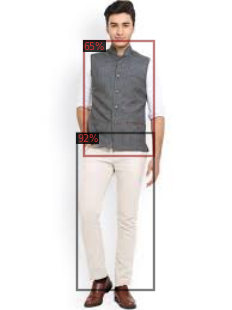

In [16]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [12]:
import uuid 

boxes = {}
for coordinates in outputs["instances"].to("cpu").pred_boxes:
  coordinates_array = []
  for k in coordinates:
    coordinates_array.append(int(k))
  
  boxes[uuid.uuid4().hex[:].upper()] = coordinates_array

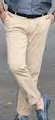

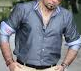

In [13]:
for k,v in boxes.items():
  crop_img = im[v[1]:v[3], v[0]:v[2], :]
  cv2_imshow(crop_img)
  cv2.imwrite(k + '.jpg', crop_img)


In [ ]:
from detectron2.modeling import build_model
model = build_model(cfg) 

In [ ]:
from detectron2.checkpoint import DetectionCheckpointer
DetectionCheckpointer(model).load("/content/drive/MyDrive/model_final.pth")

{'iteration': 1499,
 'optimizer': {'param_groups': [{'dampening': 0,
    'initial_lr': 0.001,
    'lr': 2.5000000000000006e-06,
    'momentum': 0.9,
    'nesterov': False,
    'params': [140307696855656],
    'weight_decay': 0.0001},
   {'dampening': 0,
    'initial_lr': 0.001,
    'lr': 2.5000000000000006e-06,
    'momentum': 0.9,
    'nesterov': False,
    'params': [140307696855440],
    'weight_decay': 0.0001},
   {'dampening': 0,
    'initial_lr': 0.001,
    'lr': 2.5000000000000006e-06,
    'momentum': 0.9,
    'nesterov': False,
    'params': [140307696854864],
    'weight_decay': 0.0001},
   {'dampening': 0,
    'initial_lr': 0.001,
    'lr': 2.5000000000000006e-06,
    'momentum': 0.9,
    'nesterov': False,
    'params': [140307696854216],
    'weight_decay': 0.0001},
   {'dampening': 0,
    'initial_lr': 0.001,
    'lr': 2.5000000000000006e-06,
    'momentum': 0.9,
    'nesterov': False,
    'params': [140307697241328],
    'weight_decay': 0.0001},
   {'dampening': 0,
    'i

In [ ]:
print(model.named_parameters)

<bound method Module.named_parameters of GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2):

In [ ]:
model.named_parameters

<bound method Module.named_parameters of GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2):

In [ ]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/example.jpg")
im

array([[[229, 229, 229],
        [229, 229, 229],
        [229, 229, 229],
        ...,
        [229, 229, 229],
        [229, 229, 229],
        [229, 229, 229]],

       [[229, 229, 229],
        [229, 229, 229],
        [229, 229, 229],
        ...,
        [229, 229, 229],
        [229, 229, 229],
        [229, 229, 229]],

       [[229, 229, 229],
        [229, 229, 229],
        [229, 229, 229],
        ...,
        [229, 229, 229],
        [229, 229, 229],
        [229, 229, 229]],

       ...,

       [[222, 224, 224],
        [222, 224, 224],
        [222, 224, 224],
        ...,
        [225, 227, 227],
        [225, 227, 227],
        [225, 227, 227]],

       [[222, 224, 224],
        [222, 224, 224],
        [222, 224, 224],
        ...,
        [225, 227, 227],
        [225, 227, 227],
        [225, 227, 227]],

       [[222, 224, 224],
        [222, 224, 224],
        [222, 224, 224],
        ...,
        [225, 227, 227],
        [225, 227, 227],
        [225, 227, 227]]

In [ ]:
im = torch.tensor(im)
im

tensor([[[229, 229, 229],
         [229, 229, 229],
         [229, 229, 229],
         ...,
         [229, 229, 229],
         [229, 229, 229],
         [229, 229, 229]],

        [[229, 229, 229],
         [229, 229, 229],
         [229, 229, 229],
         ...,
         [229, 229, 229],
         [229, 229, 229],
         [229, 229, 229]],

        [[229, 229, 229],
         [229, 229, 229],
         [229, 229, 229],
         ...,
         [229, 229, 229],
         [229, 229, 229],
         [229, 229, 229]],

        ...,

        [[222, 224, 224],
         [222, 224, 224],
         [222, 224, 224],
         ...,
         [225, 227, 227],
         [225, 227, 227],
         [225, 227, 227]],

        [[222, 224, 224],
         [222, 224, 224],
         [222, 224, 224],
         ...,
         [225, 227, 227],
         [225, 227, 227],
         [225, 227, 227]],

        [[222, 224, 224],
         [222, 224, 224],
         [222, 224, 224],
         ...,
         [225, 227, 227],
        

In [ ]:
im = im.unsqueeze(0)

In [ ]:
im = im.reshape(1,3,1365,1024)

In [ ]:
model.eval()

GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

In [ ]:
!unzip "/content/drive/My Drive/fashion_model.zip"

Archive:  /content/drive/My Drive/fashion_model.zip
  inflating: events.out.tfevents.1614492532.fd90e8d1129c.59.0  
  inflating: model_final.pth         
  inflating: metrics.json            
  inflating: config.yaml             
  inflating: last_checkpoint         


In [ ]:
import os
cfg = get_cfg()
cfg.merge_from_file("/content/config.yaml")
cfg.MODEL.WEIGHTS = "model_final.pth"
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

In [ ]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/4_Way_Stretch_Knitted_Livein_Culottes_L1.jpg")
outputs = predictor(im)

In [ ]:
outputs

{'instances': Instances(num_instances=2, image_height=1800, image_width=1350, fields=[pred_boxes: Boxes(tensor([[ 765.2174,  371.7262, 1173.1049,  755.5917],
         [ 351.3900,  643.0593, 1018.5907, 1583.7949]], device='cuda:0')), scores: tensor([0.7102, 0.6731], device='cuda:0'), pred_classes: tensor([0, 7], device='cuda:0')])}

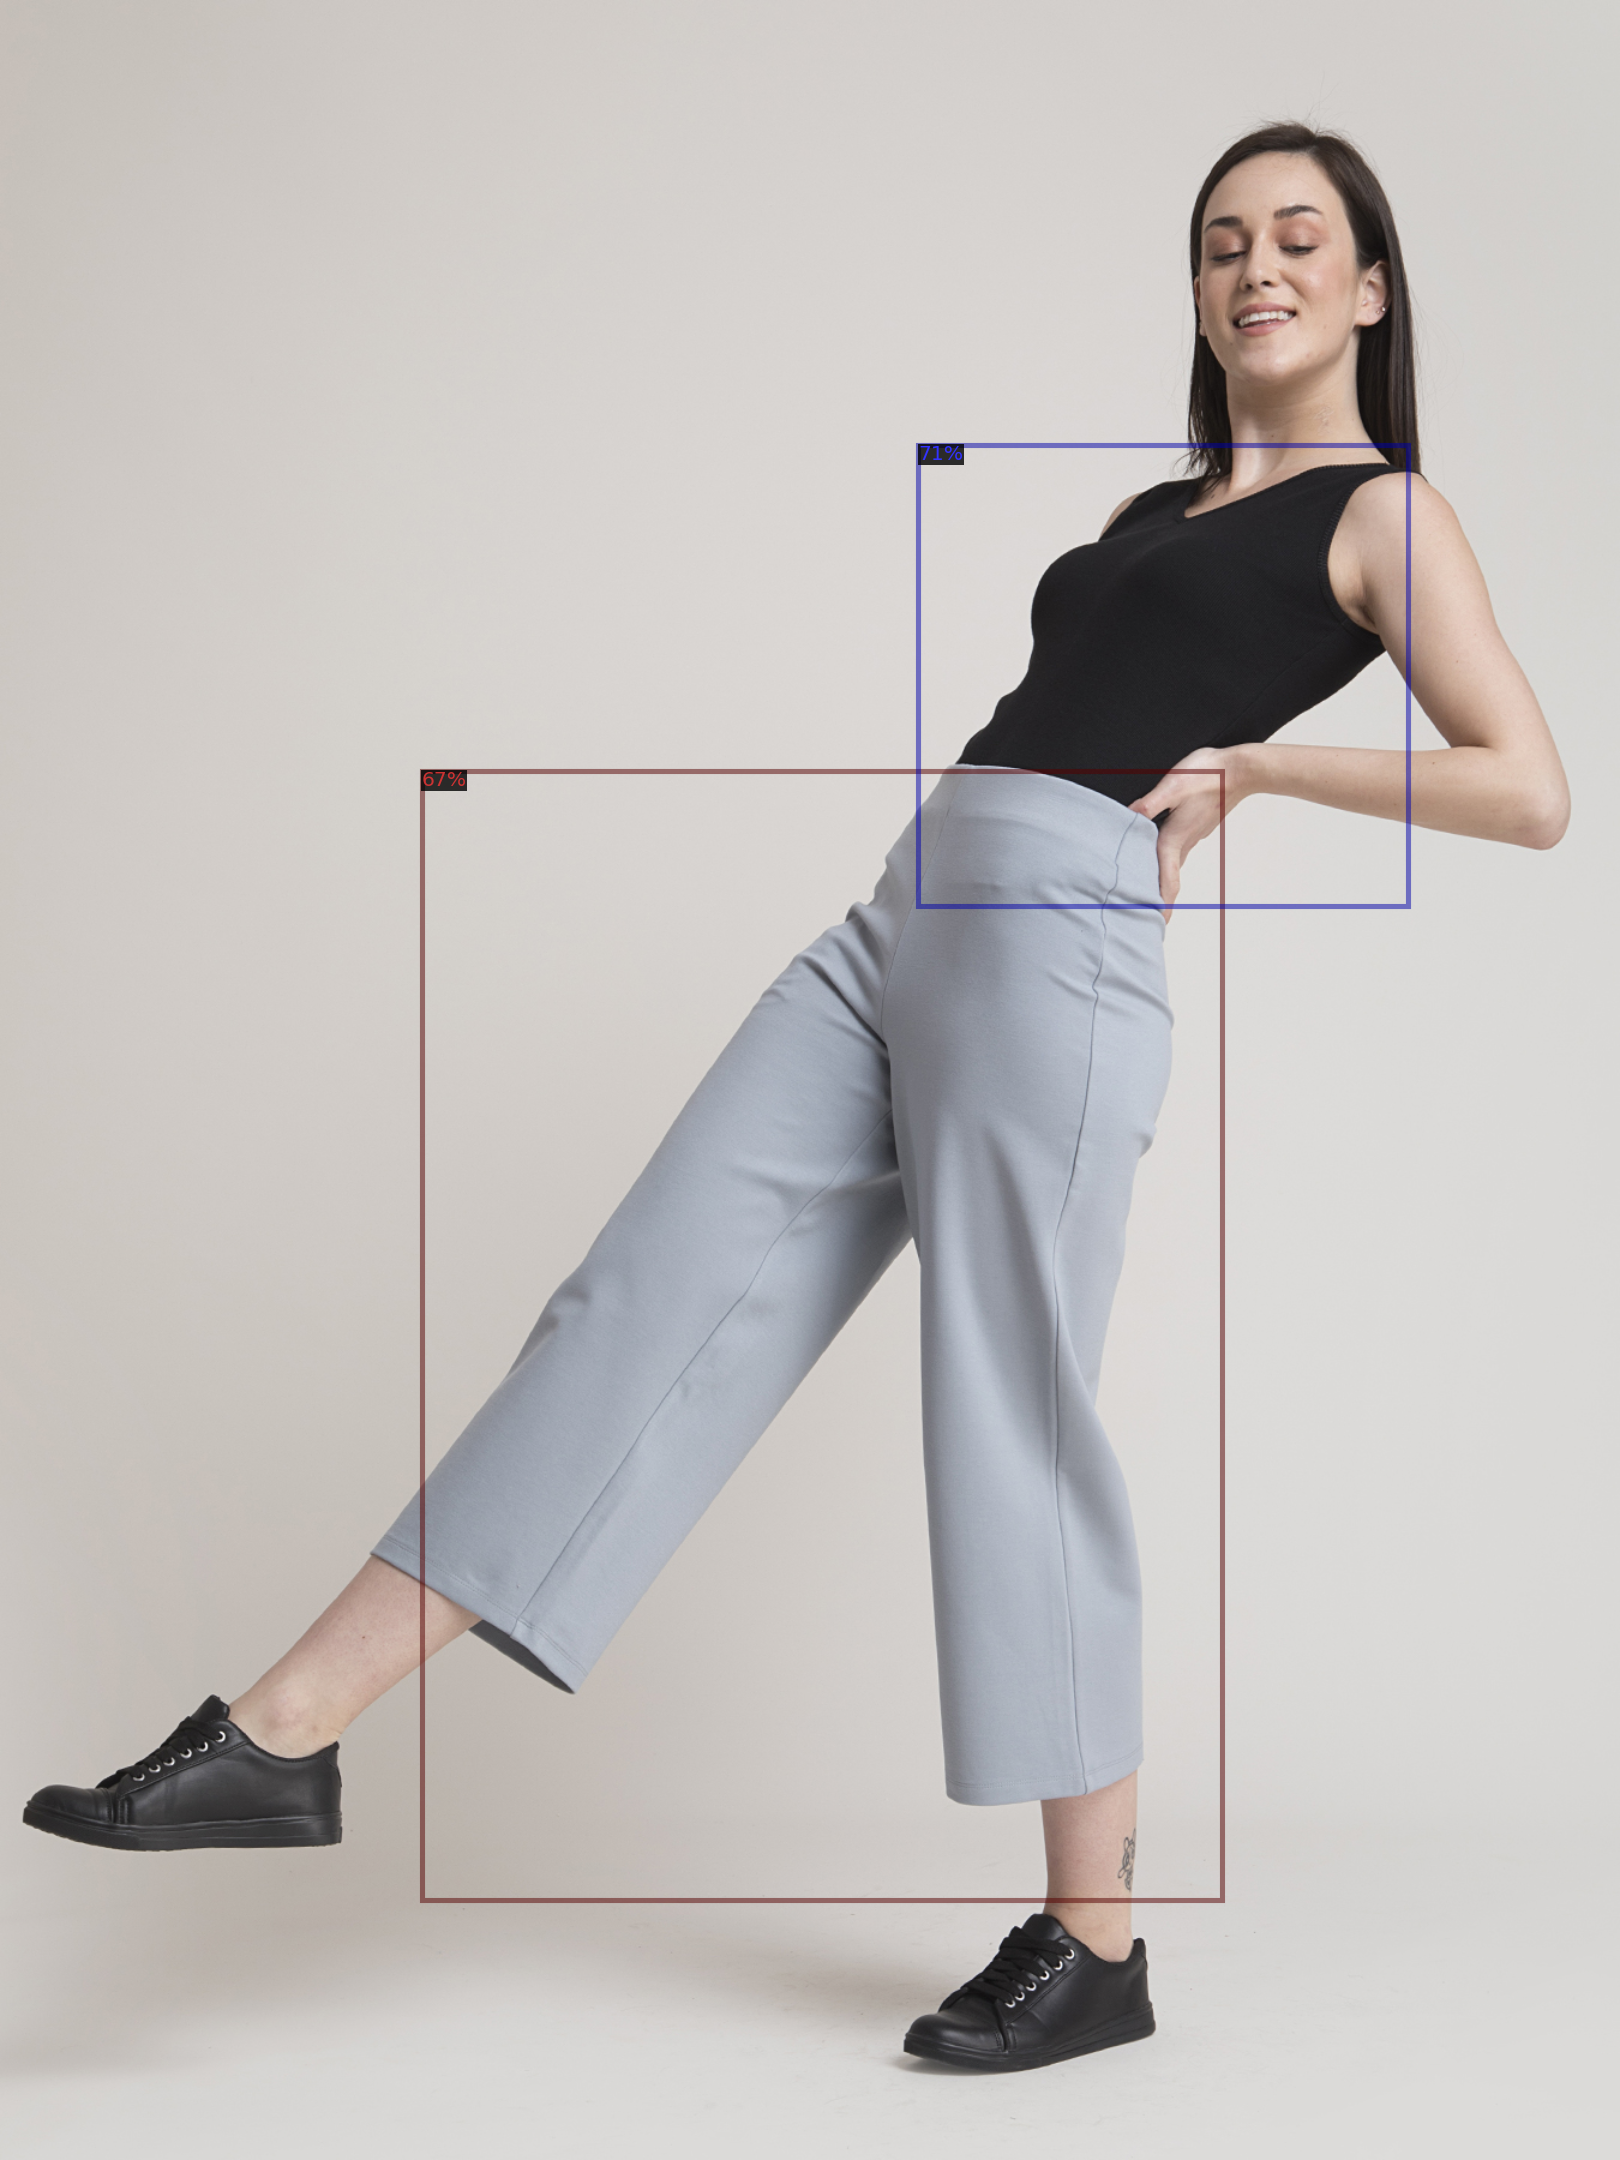

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/11473928353388-Roadster-Men-Black-Regular-Fit-Checked-Casual-Shirt-4501473928353310-4.webp")
outputs = predictor(im)

In [ ]:
outputs

{'instances': Instances(num_instances=2, image_height=720, image_width=540, fields=[pred_boxes: Boxes(tensor([[214.3425, 306.1613, 366.4081, 649.4264],
         [171.8370,  85.2376, 405.7060, 363.1578]], device='cuda:0')), scores: tensor([0.9919, 0.7237], device='cuda:0'), pred_classes: tensor([7, 0], device='cuda:0')])}

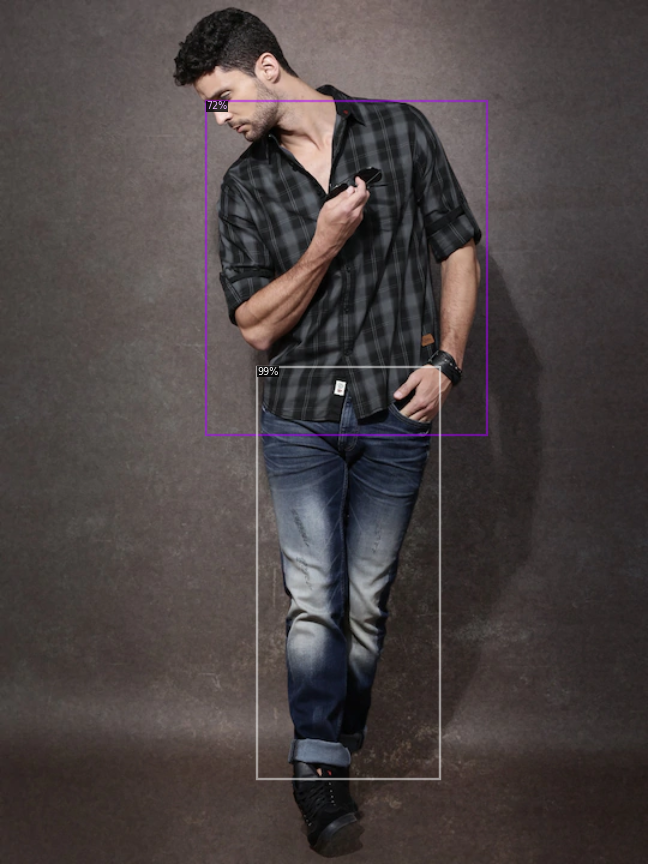

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
import uuid 

boxes = {}
for coordinates in outputs["instances"].to("cpu").pred_boxes:
  coordinates_array = []
  for k in coordinates:
    coordinates_array.append(int(k))
  
  boxes[uuid.uuid4().hex[:].upper()] = coordinates_array

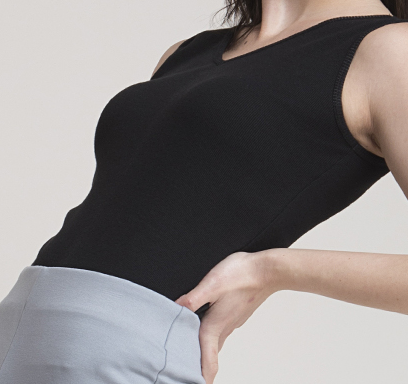

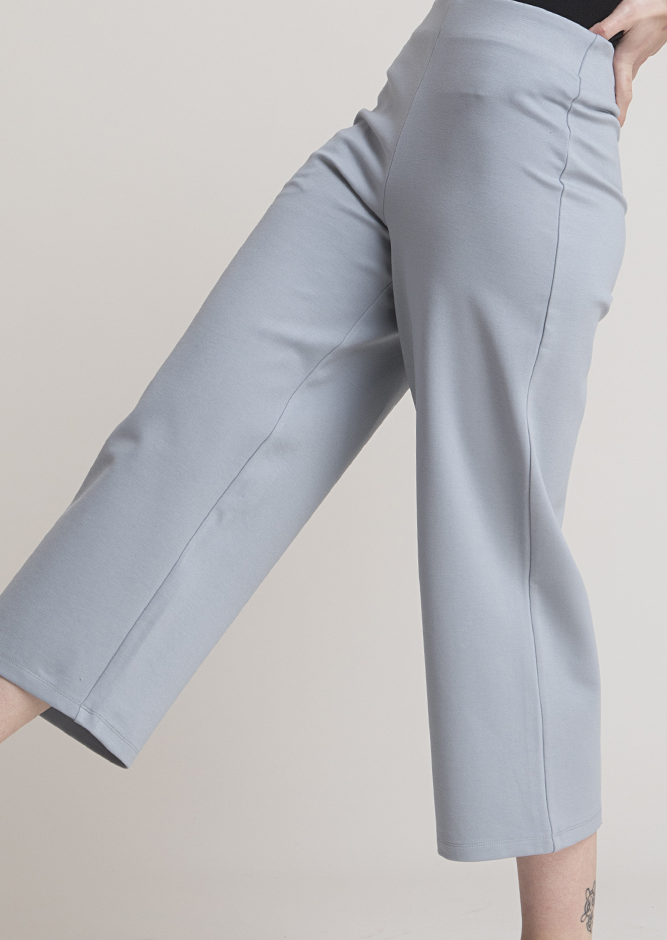

In [ ]:
for k,v in boxes.items():
  crop_img = im[v[1]:v[3], v[0]:v[2], :]
  cv2_imshow(crop_img)
  cv2.imwrite(k + '.jpg', crop_img)


In [ ]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/2dd420f8-69a7-4d77-bcf5-a10f1df96b961564657609249-Roadster-Unisex-Olive-Green-Solid-Messenger-Bag-338156465760-1.webp")
outputs = predictor(im)
outputs

{'instances': Instances(num_instances=3, image_height=720, image_width=540, fields=[pred_boxes: Boxes(tensor([[209.2963, 429.6559, 400.2202, 718.9094],
         [259.3314, 519.2527, 401.8972, 715.5724],
         [116.4438, 393.1123, 397.0212, 643.2830]], device='cuda:0')), scores: tensor([0.8568, 0.7742, 0.6823], device='cuda:0'), pred_classes: tensor([7, 7, 8], device='cuda:0')])}

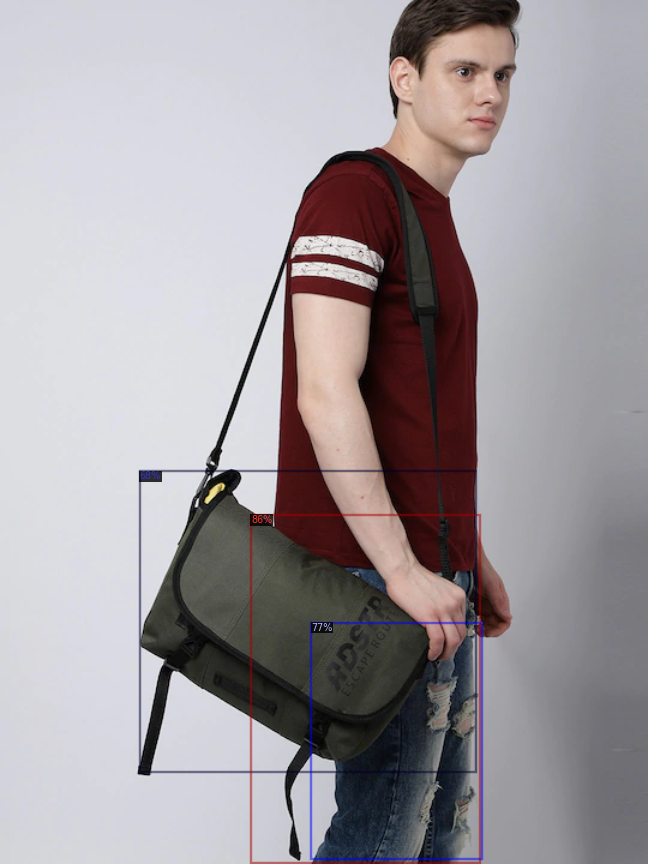

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

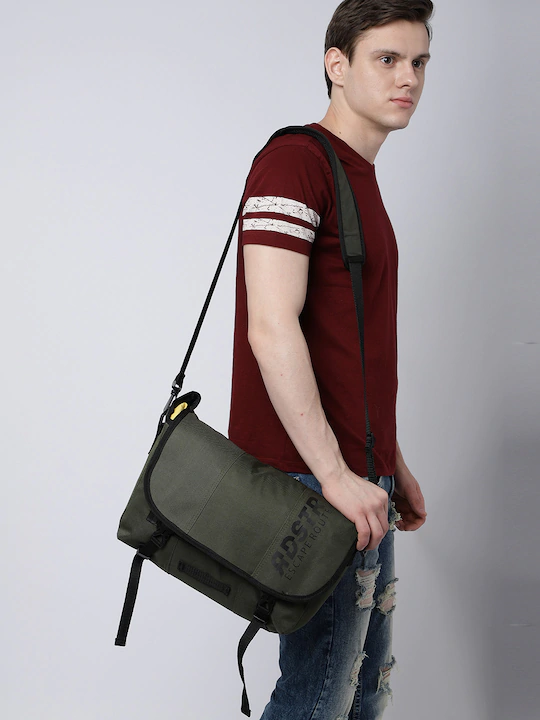

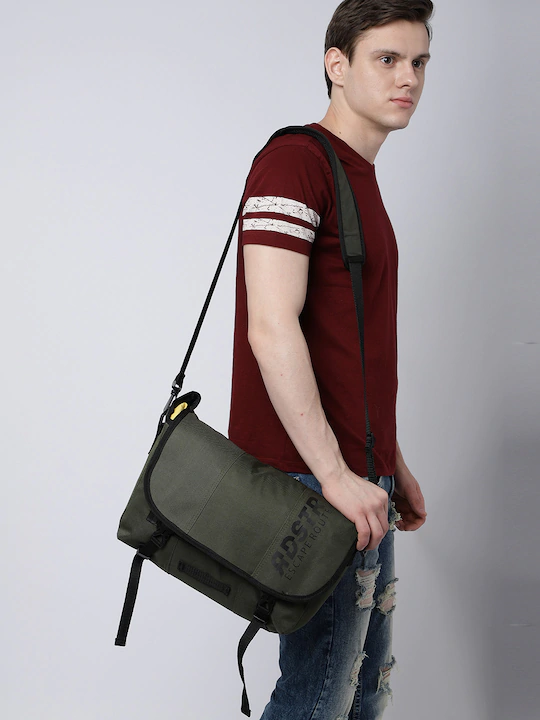

In [ ]:
for k,v in boxes.items():
  crop_img = im[:, :, :]
  cv2_imshow(crop_img)
  cv2.imwrite(k + '.jpg', crop_img)


  0% 0.00/874k [00:00<?, ?B/s]
100% 874k/874k [00:00<00:00, 61.4MB/s]
  0% 0.00/635k [00:00<?, ?B/s]
100% 635k/635k [00:00<00:00, 90.1MB/s]
  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 92.7MB/s]
  0% 0.00/351k [00:00<?, ?B/s]
100% 351k/351k [00:00<00:00, 114MB/s]
  0% 0.00/467k [00:00<?, ?B/s]
100% 467k/467k [00:00<00:00, 154MB/s]
  0% 0.00/81.1k [00:00<?, ?B/s]
100% 81.1k/81.1k [00:00<00:00, 75.6MB/s]
  0% 0.00/754k [00:00<?, ?B/s]
100% 754k/754k [00:00<00:00, 103MB/s]
  0% 0.00/799k [00:00<?, ?B/s]
100% 799k/799k [00:00<00:00, 110MB/s]
  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 83.6MB/s]
  0% 0.00/2.77M [00:00<?, ?B/s]
100% 2.77M/2.77M [00:00<00:00, 187MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 74.6MB/s]
  0% 0.00/143k [00:00<?, ?B/s]
100% 143k/143k [00:00<00:00, 41.6MB/s]
  0% 0.00/0.99M [00:00<?, ?B/s]
100% 0.99M/0.99M [00:00<00:00, 143MB/s]
  0% 0.00/38.1k [00:00<?, ?B/s]
100% 38.1k/38.1k [00:00<00:00, 38.8MB/s]
  0% 0.00/1